In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
import pdvega
import seaborn as sns
# for configuring connection 
from configobj import ConfigObj
import os

%matplotlib inline

In [3]:
# Create a database connection using settings from config file
config='../db/config.ini'

# connection info
conn_info = dict()
if os.path.isfile(config):
    config = ConfigObj(config)
    conn_info["sqluser"] = config['username']
    conn_info["sqlpass"] = config['password']
    conn_info["sqlhost"] = config['host']
    conn_info["sqlport"] = config['port']
    conn_info["dbname"] = config['dbname']
    conn_info["schema_name"] = config['schema_name']
else:
    conn_info["sqluser"] = 'postgres'
    conn_info["sqlpass"] = ''
    conn_info["sqlhost"] = '192.168.60.144'
    conn_info["sqlport"] = 6432
    conn_info["dbname"] = 'eicu'
    conn_info["schema_name"] = 'public,eicu_crd'
    
# Connect to the eICU database
print('Database: {}'.format(conn_info['dbname']))
print('Username: {}'.format(conn_info["sqluser"]))
if conn_info["sqlpass"] == '':
    # try connecting without password, i.e. peer or OS authentication
    try:
        if (conn_info["sqlhost"] == '192.168.60.144') & (conn_info["sqlport"]=='6432'):
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   user=conn_info["sqluser"])            
        else:
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   host=conn_info["sqlhost"],
                                   port=conn_info["sqlport"],
                                   user=conn_info["sqluser"])
    except:
        conn_info["sqlpass"] = getpass.getpass('Password: ')

        con = psycopg2.connect(dbname=conn_info["dbname"],
                               host=conn_info["sqlhost"],
                               port=conn_info["sqlport"],
                               user=conn_info["sqluser"],
                               password=conn_info["sqlpass"])
query_schema = 'set search_path to ' + conn_info['schema_name'] + ';'

Database: eicu
Username: postgres


In [4]:
from sqlalchemy import create_engine,text
con= create_engine('postgresql://eicu@192.168.60.144:6432/eicu')

In [5]:
datadir = '/home/mei/nas/docker/dataset/EICU/eicu-collaborative-research-database-2.0/'
porcesseddir2 = '/home/mei/nas/docker/processedData_2/'

In [6]:
def round_up(x, base=5):
    return base * round(x/base)

In [9]:
query = query_schema + """
select va.*
from vitalaperiodic va
join patient_2 p
  on va.patientunitstayid = p.patientunitstayid
  
order by p.patientunitstayid, va.observationoffset
"""

In [10]:
df_vitalap= pd.read_sql_query(query,con)
df_vitalap.head(n=20)

,vitalaperiodicid,patientunitstayid,observationoffset,noninvasivesystolic,noninvasivediastolic,noninvasivemean,paop,cardiacoutput,cardiacinput,svr,svri,pvr,pvri
0,4295737,141168,123,106.0,68.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4295738,141168,138,111.0,62.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4295739,141168,349,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4295740,141168,441,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4295741,141168,1398,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6299075,141265,3,161.0,88.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6299076,141265,19,155.0,97.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6299077,141265,25,143.0,89.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6299078,141265,85,168.0,100.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6299079,141265,88,163.0,94.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
vitalap = df_vitalap.copy()
# Set indices
vitalap.set_index(['patientunitstayid', 'observationoffset'], inplace = True)
vitalap.drop(vitalap.index[np.where(vitalap.index.get_level_values('observationoffset') < 0)], inplace= True)
vitalap.drop(columns = 'vitalaperiodicid', inplace= True)
vitalap.sort_index(level = ['patientunitstayid', 'observationoffset'], inplace = True)
# Resample every 5 mins
vitalap.rename(round_up, level = 'observationoffset', inplace = True)
vitalap = vitalap.groupby(['patientunitstayid', 'observationoffset']).mean()

In [13]:
vitalap.head(n=10)

noninvasivesystolic  \
patientunitstayid observationoffset                        
141168            125                              106.0   
                  140                              111.0   
                  350                                NaN   
                  440                                NaN   
                  1400                               NaN   
141265            5                                161.0   
                  20                               155.0   
                  25                               143.0   
                  85                               168.0   
                  90                               163.0   

                                     noninvasivediastolic  noninvasivemean  \
patientunitstayid observationoffset                                          
141168            125                                68.0             81.0   
                  140                                62.0             82.0   
                  350                                 NaN             79.0   
                  440                                 NaN             62.0   
                  1400                                NaN             27.0   
141265            5                                  88.0            119.0   
                  20                                 97.0            120.0   
                  25                                 89.0            111.0   
                  85                                100.0            125.0   
                  90                                 94.0            124.0   

                                     paop  cardiacoutput  cardiacinput  svr  \
patientunitstayid observationoffset                                           
141168            125                 NaN            NaN           NaN  NaN   
                  140                 NaN            NaN           NaN  NaN   
                  350                 NaN            NaN           NaN  NaN   
                  440                 NaN            NaN           NaN  NaN   
                  1400                NaN            NaN           NaN  NaN   
141265            5                   NaN            NaN           NaN  NaN   
                  20                  NaN            NaN           NaN  NaN   
                  25                  NaN            NaN           NaN  NaN   
                  85                  NaN            NaN           NaN  NaN   
                  90                  NaN            NaN           NaN  NaN   

                                     svri  pvr  pvri  
patientunitstayid observationoffset                   
141168            125                 NaN  NaN   NaN  
                  140                 NaN  NaN   NaN  
                  350                 NaN  NaN   NaN  
                  440                 NaN  NaN   NaN  
                  1400                NaN  NaN   NaN  
141265            5                   NaN  NaN   NaN  
                  20                  NaN  NaN   NaN  
                  25                  NaN  NaN   NaN  
                  85                  NaN  NaN   NaN  
                  90                  NaN  NaN   NaN

In [10]:
# vitalap.to_csv(porcesseddir2 + 'selected_vital_Aperiodic.csv',  index=True)

vitalap= pd.read_csv(porcesseddir2 + 'selected_vital_Aperiodic.csv')
vitalap.set_index(['patientunitstayid', 'observationoffset'], inplace = True)
vitalap.sort_index(level = ['patientunitstayid', 'observationoffset'], inplace = True)


In [12]:
n=len(list(vitalap.index.get_level_values('patientunitstayid').unique()))
r=len(vitalap)
print("There are {} unique patientunitstayid in the selected patients with the total {} records.".format(n,r))

There are 67398 unique patientunitstayid in the selected patients with the total 8550522 records.


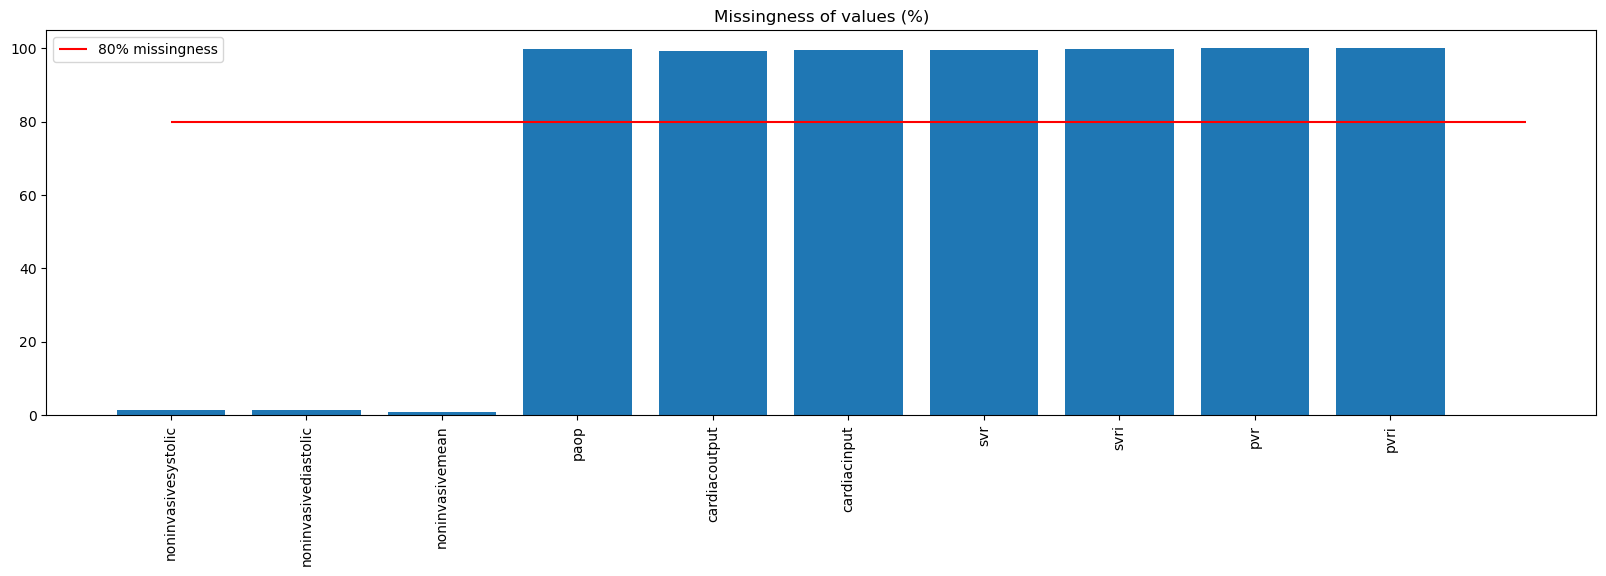

In [13]:
df= vitalap.copy()
missing_ratio = pd.DataFrame(df.isna().sum() / len(df.index), columns = ['missing ratio']) * 100
plt.rcParams["figure.figsize"] = (20,5)
plt.title('Missingness of values (%)')
plt.bar(missing_ratio.index, missing_ratio['missing ratio'])
plt.xticks(np.arange(0, len(missing_ratio.index)), labels=missing_ratio.index, rotation=90)
plt.hlines(80, 0, len(missing_ratio.index), colors = 'red', label = '80% missingness')
plt.legend()
plt.show()

In [14]:
missing_ratio = pd.DataFrame(df.isna().sum() / len(df.index), columns = ['missing ratio %']) * 100
missing_ratio.sort_values('missing ratio %', inplace = True, ascending = False) 
missing_ratio

,missing ratio %
pvri,99.976890
pvr,99.976832
paop,99.964996
svri,99.869178
cardiacinput,99.626081
svr,99.592773
cardiacoutput,99.371489
noninvasivesystolic,1.331030
noninvasivediastolic,1.320925
noninvasivemean,0.827961
